# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import norm
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

# Input csv data into dataframe df
df = pd.read_csv('data/human_body_temperature.csv')

In [23]:
# Number of Samples in this data frame
len(df)

130

In [24]:
#Summary Stats of df
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## Is the distribution of body temperatures normal?

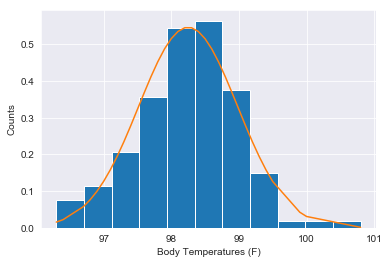

In [25]:
# plotting a histogram using graphical tests, shows normal bell curve like shape.
temp_df = df['temperature'].sort_values()
n_bins = int(np.sqrt(len(temp_df)))
sns.set_style("darkgrid")
_ = plt.hist(temp_df, density=True, bins=n_bins)
_ = plt.plot(temp_df,norm.pdf(temp_df,np.mean(temp_df), np.std(temp_df)))
_ = plt.xlabel('Body Temperatures (F)')
_ = plt.ylabel('Counts')
_ = plt.show()

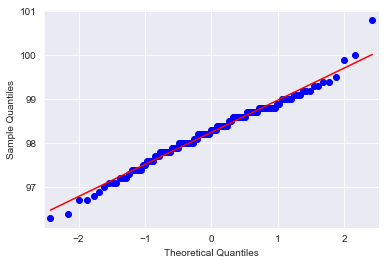

In [26]:
# plotting a Q-Q plot using graphical tests, shows a closely fitted line for normal distribution.
_ = qqplot(temp_df, line='s')
_ = plt.show()

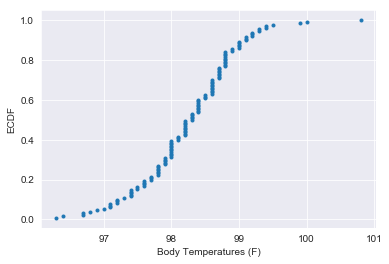

In [27]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y
# Computing the ECDF of Body Temperatures
x_temp ,y_temp = ecdf(temp_df)

# Plottign the ECDF for Body Temperatures
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')
_ = plt.xlabel('Body Temperatures (F)')
_ = plt.ylabel('ECDF')

In [28]:
# 1st normality test using Shapiro-Wilk Test
stat, p = shapiro(temp_df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normal (fail to reject H0)')
else:
    print('Sample does not look normal (reject H0)')

Statistics=0.987, p=0.233
Sample looks normal (fail to reject H0)


In [29]:
# 2nd normality test using D’Agostino’s K^2 Test
stat, p = normaltest(temp_df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normal (fail to reject H0)')
else:
    print('Sample does not look normal (reject H0)')

Statistics=2.704, p=0.259
Sample looks normal (fail to reject H0)


In [30]:
# 3rd normality test using Anderson-Darling Test
result = anderson(temp_df)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.520
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.637, data looks normal (fail to reject H0)
5.000: 0.765, data looks normal (fail to reject H0)
2.500: 0.892, data looks normal (fail to reject H0)
1.000: 1.061, data looks normal (fail to reject H0)


> _In conclusion from the above EDA and normality testing we can conclude that the distribution of the dataset is infact normal._

## Is the sample size large? Are the observations independent?

> _The population sample in this dataframe which is the body temperatures of all human beings is tough to obtain and because Central Limit Theorem states that when a sample size of n >= 30, then we can treat the sampling distribution as approximatly normal regardless of the shape of parent population. This data set has samples of n=130 and has normal distribution so the sample size is large enough._

> _The true independent sample are the ones when they are replaced, however with the 10% rule which says that the if our sample size is less than 10% of population and in this case it is less that the true human population which is relatively very larger compared to 130. This sample meets the independence condition._

## Is the true population mean really 98.6 degrees F?

- First, try a bootstrap hypothesis test

#### _Hypothosis Testing_

- H0 - mean of population body temperatures is equal to 98.6
- HA - mean of population body temperatures is not equal to 98.6

In [31]:
# define a bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# define function to generate bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

p-value: 0.0

mean: 98.249


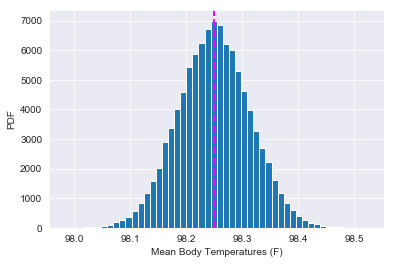

In [32]:
# bootstrap hypothesis testing for 100,000 samples with mean body temperatures
bs_replicates = draw_bs_reps(temp_df,np.mean,100000)

# compute the p-value of the bootstrap replicates that are greater than 98.6 (assuming H0 is true) 
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)

t_stat = np.mean(bs_replicates)

print('p-value: {}\n'.format(p))
print('mean: {:0.5}'.format(t_stat))

# Plot a histogram of the results
_ = plt.hist(bs_replicates, bins=50)
_ = plt.axvline(t_stat, color='magenta', linestyle='dashed', linewidth=2)
_ = plt.xlabel('Mean Body Temperatures (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

> _Since p-value for 100,000 samples is 0.0 from our bootstrap hypothesis testing we can safely reject the null hypothesis and accept the alternate hypothesis that mean is not equal to 98.6, it is infact 98.249 as see above._

- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?


> _Since in the experiment we were trying to determine if the population mean was different that a constant value of 98.6, a one-sample test would be utilized._

- In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?

> _Since in this test we are comparing the population mean to sample mean and we do not know what the population standard deviation is, so a t-statistic is more applicable for our testing since we would be able to estimate the standard deviation which is the sample standard deviation divided by number of samples._

In [33]:
# One-sample t-test with population mean of 98.6
t1, p1 = stats.ttest_1samp(temp_df, 98.6)
print('t-score from One Sample t-test: {}\n'.format(round(t1, 3)))
print('p-value from One Sample t-test: {}\n'.format(p1))
if p1<0.05:
    print("reject null hypothesis and accept alterate hypothesis since {} < 0.05\n".format(round(p1,3)))
else:
    print("fail to reject null hypothesis since {} > 0.05\n".format(round(p1,3)))

t-score from One Sample t-test: -5.455

p-value from One Sample t-test: 2.410632041561008e-07

reject null hypothesis and accept alterate hypothesis since 0.0 < 0.05



- Now try using the other test. How is the result be different? Why?

In [34]:
# Z-test with mean of 98.6
t2, p2 = ztest(x1=temp_df, value=98.6)
print('t-score from One Sample z-test: {}\n'.format(round(t2, 3)))
print('p-value from One Sample z-test: {}\n'.format(p2))
if p2<0.05:
    print("reject null hypothesis and accept alterate hypothesis since {} < 0.05\n".format(round(p2,3)))
else:
    print("fail to reject null hypothesis since {} > 0.05\n".format(round(p2,3)))

t-score from One Sample z-test: -5.455

p-value from One Sample z-test: 4.902157014113424e-08

reject null hypothesis and accept alterate hypothesis since 0.0 < 0.05



> _In conclusion the p-value from one sample z-test is smaller than the p-value from one sample t-test. This suggests that, if our sample standard deviation is truly representative of the population standard deviation, then it is even more unlikely that the null hypothesis is true._

# Draw a small sample of size 10 from the data and repeat both frequentist tests.
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [35]:
# Randam sample of size 10
small_sample = np.random.choice(temp_df, size=10)

# Repear One-sample t-test with population mean of 98.6 with small sample
t3, p3 = stats.ttest_1samp(small_sample, 98.6)
print('t-score from One Sample t-test: {}\n'.format(round(t3, 3)))
print('p-value from One Sample t-test: {}\n'.format(p3))
if p3<0.05:
    print("reject null hypothesis and accept alterate hypothesis since {} < 0.05\n".format(round(p3,3)))
else:
    print("fail to reject null hypothesis since {} > 0.05\n".format(round(p3,3)))

t-score from One Sample t-test: -1.266

p-value from One Sample t-test: 0.23718492859995952

fail to reject null hypothesis since 0.237 > 0.05



In [36]:
# Repeat Z-test with mean of 98.6 ith sample sample
t4, p4 = ztest(x1=small_sample, value=98.6)
print('t-score from One Sample z-test: {}\n'.format(round(t4, 3)))
print('p-value from One Sample z-test: {}\n'.format(p4))
if p4<0.05:
    print("reject null hypothesis and accept alterate hypothesis since {} < 0.05\n".format(round(p4,3)))
else:
    print("fail to reject null hypothesis since {} > 0.05\n".format(round(p4,3)))

t-score from One Sample z-test: -1.266

p-value from One Sample z-test: 0.20539271424958216

fail to reject null hypothesis since 0.205 > 0.05



> _Since the sample size is small that 30 and we do not know the standard deviation of the population, it is more appropriate to use t-statistic rather than the z-statistic._

> _After running both tests for smaller sample size of 10 random values, the tests produced consistant low p-values in t-test rather than z-test, this may be becuase the t-scores take the degree of freedom into consideration where as z-scores do not._

# At what temperature should we consider someone's temperature to be "abnormal"?
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [37]:
# Compute the 95% Confidence interval using bootstrap approach
ci_bs = np.percentile(bs_replicates, [2.5,97.5])

print('95% Confidence Interval using Bootstrap Approach:''{:0.5} to {:0.5}\n'.format(ci_bs[0],ci_bs[1]))

# calculate the z_critical value with q = 0.975 since its distribution has two tails
z_critical = stats.norm.ppf(q = 0.975)
print('z_critical value: {:0.5}\n'.format(z_critical))

# calculate the t_critical value with q = 0.975 since its distribution has two tails and df of 130-1
t_critical = stats.t.ppf(q = 0.975, df=129)
print('t_critical value: {:0.5}\n'.format(t_critical))

# Compute the 95% Confidence Interval using Frequentist Approach
sqrt_n = np.sqrt(len(temp_df))
std_n = np.std(temp_df)
sem_n = std_n / sqrt_n
mean_n = np.mean(temp_df)
margin_error = z_critical * sem_n
ci_f1 = mean_n - margin_error
ci_f2 = mean_n + margin_error

print('margin of error: {:0.5}\n'.format(margin_error))
print('95% Confidence Interval using Frequentist Approach:''{:0.5} to {:0.5}\n'.format(ci_f1,ci_f2))


95% Confidence Interval using Bootstrap Approach:98.124 to 98.375

z_critical value: 1.96

t_critical value: 1.9785

margin of error: 0.12555

95% Confidence Interval using Frequentist Approach:98.124 to 98.375



> _Any values below or above either the Bootstrap CI or Frequentist CI are considered Abnormal._

# Is there a significant difference between males and females in normal temperature?
- What testing approach did you use and why?
- Write a story with your conclusion in the context of the original problem.

>  _Since we are trying to see the difference of two unique sampeles, male and female, we would go with two-sample testing._

In [38]:
#EDA of male and female temperature data
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

females.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [39]:
males.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


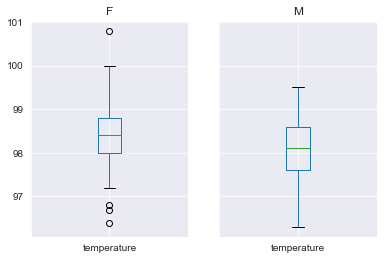

In [40]:
df_temp = df.groupby("gender")
df_temp.boxplot(column=['temperature'])
plt.show()

> _The mean and standard deviation of the male and female temperature samples vary, from the plot above it looks like males have sligthly lower normal body temperatures compared to females._

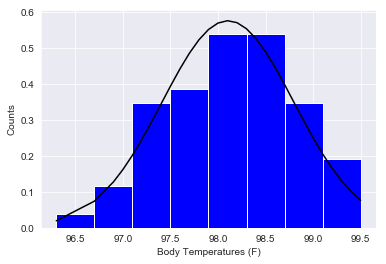

In [41]:
# plotting a histogram using graphical tests, shows normal bell curve like shape for males
male_temps = males['temperature'].sort_values()
n_bins = int(np.sqrt(len(males)))
sns.set_style("darkgrid")
_ = plt.hist(male_temps, density=True, bins=n_bins,color='blue')
_ = plt.plot(male_temps,norm.pdf(male_temps,np.mean(male_temps), np.std(male_temps)), color='k')
_ = plt.xlabel('Body Temperatures (F)')
_ = plt.ylabel('Counts')
_ = plt.show()

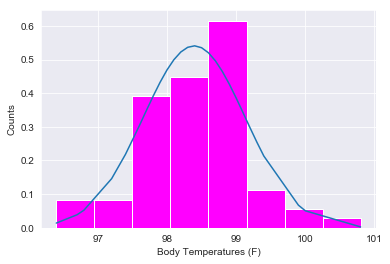

In [42]:
# plotting a histogram using graphical tests, shows normal bell curve like shape for females
female_temps = females['temperature'].sort_values()
n_bins = int(np.sqrt(len(females)))
sns.set_style("darkgrid")
_ = plt.hist(female_temps, density=True, bins=n_bins, color='magenta')
_ = plt.plot(female_temps,norm.pdf(female_temps,np.mean(female_temps), np.std(female_temps)))
_ = plt.xlabel('Body Temperatures (F)')
_ = plt.ylabel('Counts')
_ = plt.show()

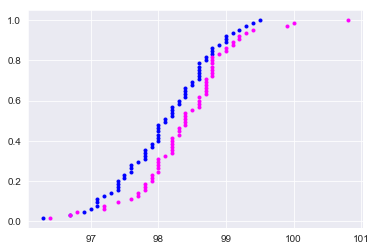

In [43]:
# Compute the ECDFs for males and females
x_males, y_males = ecdf(male_temps)
x_females, y_females = ecdf(female_temps)

# ECDF plots for males and females
plt.plot(x_males, y_males, marker = '.', linestyle = 'none', color='blue')
plt.plot(x_females, y_females, marker='.', linestyle='none', color='magenta')
plt.margins = 0.02
plt.show()

> Hypothesis Testing
<br> _H0 - Male and Female normal temperatures are the same._
<br> _HA - Male and Female normal temperatures are not the same._

In [44]:
# bootstrap hypothesis testing for 100,000 samples with variance of male body temperatures
bs_replicates_m = draw_bs_reps(male_temps,np.var,100000)

# compute the p-value of the bootstrap replicates 
p = np.sum(bs_replicates_m) / len(bs_replicates_m)

print('p-value for Male Temperature variance: {}\n'.format(p))

# bootstrap hypothesis testing for 100,000 samples with variance of male body temperatures
bs_replicates_f = draw_bs_reps(female_temps,np.var,100000)

# compute the p-value of the bootstrap replicates 
p = np.sum(bs_replicates_f) / len(bs_replicates_f)

print('p-value for Female Temperature variance: {}\n'.format(p))

p-value for Male Temperature variance: 0.47348197192899405

p-value for Female Temperature variance: 0.5358149643550286



In [45]:
# 2 sample t-test
two_samp_res = stats.ttest_ind(male_temps, female_temps, equal_var=False)
# pvalue < 0.05 reject null hypothesis, temperature mean between male and female are not equal
print('t-statistic: {:0.5}\np-value: {:0.5}'.format(two_samp_res.statistic, two_samp_res.pvalue))

if two_samp_res.pvalue<0.05:
    print("reject null hypothesis and accept alterate hypothesis since {} < 0.05\n".format(round(two_samp_res.pvalue,3)))
else:
    print("fail to reject null hypothesis since {} > 0.05\n".format(round(two_samp_res.pvalue,3)))

t-statistic: -2.2854
p-value: 0.023938
reject null hypothesis and accept alterate hypothesis since 0.024 < 0.05



> _Based on the two sample hypothesis test performed above, with the p-value less than the significance level we can conculde that the normal temperatures for males and females are not the same._